## Датасет Heart Disease 

Потенциальное применение:
- Предсказание наличия болезни сердца
- Исследование медицинских паттернов

### Обоснование выбора библиотеки машинного обучения

Для решения простой задачи классификации
(например, определение наличия болезни сердца на основе клинических данных)
была выбрана библиотека Scikit-learn (sklearn).
Это одна из наиболее популярных библиотек для машинного обучения в Python, и она идеально подходит для:

- Быстрого прототипирования и тестирования моделей;
- Поддержки простейших алгоритмов (например, логистической регрессии, дерева решений, k-ближайших соседей);
- Интеграции с библиотеками для анализа и визуализации данных (Pandas, Matplotlib, Seaborn);
- Простоты синтаксиса и документации, что делает её удобной для студентов и начинающих специалистов.

Для предварительной обработки данных используются:

- Pandas — для очистки, замены пропущенных значений, кодирования признаков;
- Seaborn / Matplotlib — для визуализации распределений признаков и корреляций.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Названия столбцов из датасета
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# 2. Загружаем CSV-файл и заменяем '?' на NaN
df = pd.read_csv("processed.cleveland.data", names=col_names, na_values='?')

| №  | Название     | Тип данных | Описание |
|----|--------------|------------|----------|
| 1  | `age`        | float      | Возраст пациента (в годах) |
| 2  | `sex`        | int (0/1)  | Пол пациента (1 = мужчина, 0 = женщина) |
| 3  | `cp`         | int (1–4)  | Тип боли в груди:  
1 = типичная стенокардия  
2 = атипичная стенокардия  
3 = неангинальная боль  
4 = бессимптомный |
| 4  | `trestbps`   | float      | Артериальное давление в покое (мм рт. ст.) |
| 5  | `chol`       | float      | Уровень холестерина в сыворотке (мг/дл) |
| 6  | `fbs`        | int (0/1)  | Сахар натощак > 120 мг/дл (1 = да, 0 = нет) |
| 7  | `restecg`    | int (0–2)  | Результаты ЭКГ в покое:  
0 = нормальный  
1 = отклонения сегмента ST-T  
2 = гипертрофия левого желудочка |
| 8  | `thalach`    | float      | Максимальная ЧСС (пульс) при нагрузке |
| 9  | `exang`      | int (0/1)  | Стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет) |
| 10 | `oldpeak`    | float      | Угнетение сегмента ST при нагрузке относительно состояния покоя |
| 11 | `slope`      | int (1–3)  | Форма ST-сегмента на пике нагрузки:  
1 = возрастающий  
2 = плоский  
3 = нисходящий |
| 12 | `ca`         | int (0–3)  | Количество окрашенных крупных сосудов (флюороскопия) |
| 13 | `thal`       | int (3, 6, 7) | Результат таллиевого теста:  
3 = норма  
6 = фиксированный дефект  
7 = обратимый дефект |
| 14 | `num`        | int (0–4)  | Диагноз:  
0 = нет болезни  
1–4 = степень заболевания  
(обычно бинаризуется в целевой признак `target`) |


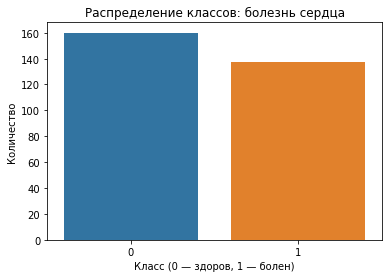

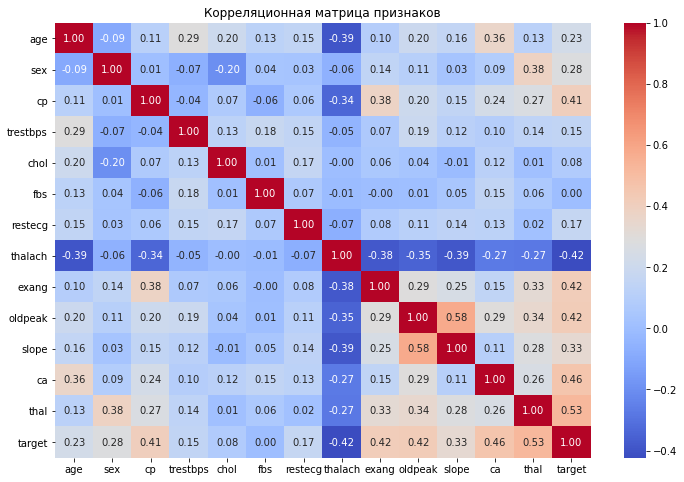

Точность (accuracy): 0.8833333333333333

Классификационный отчёт:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



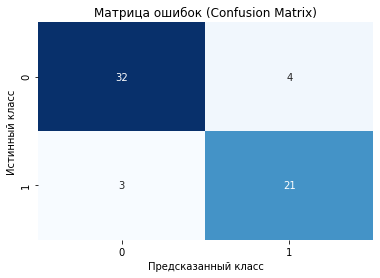

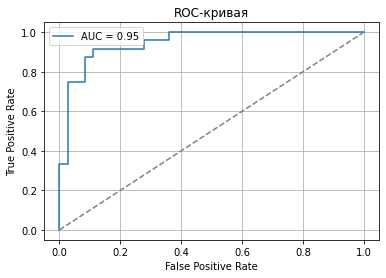

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

# 1. Загрузка и очистка данных
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

df = pd.read_csv("processed.cleveland.data", names=col_names, na_values='?')
df = df.dropna()
df = df.astype(float)

# 2. Преобразование целевого признака: 1 — болезнь есть, 0 — нет
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns=["num"])

# 3. Визуализация распределения классов
sns.countplot(x="target", data=df)
plt.title("Распределение классов: болезнь сердца")
plt.xlabel("Класс (0 — здоров, 1 — болен)")
plt.ylabel("Количество")
plt.show()

# 4. Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

# 5. Подготовка признаков и целевого столбца
X = df.drop(columns=["target"])
y = df["target"]

# 6. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Предсказание и отчёт
y_pred = model.predict(X_test)
print("Точность (accuracy):", accuracy_score(y_test, y_pred))
print("\nКлассификационный отчёт:\n", classification_report(y_test, y_pred))

# 9. Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Матрица ошибок (Confusion Matrix)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# 10. ROC-кривая и AUC
y_proba = model.predict_proba(X_test)[:, 1]  # вероятности положительного класса
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC-кривая")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


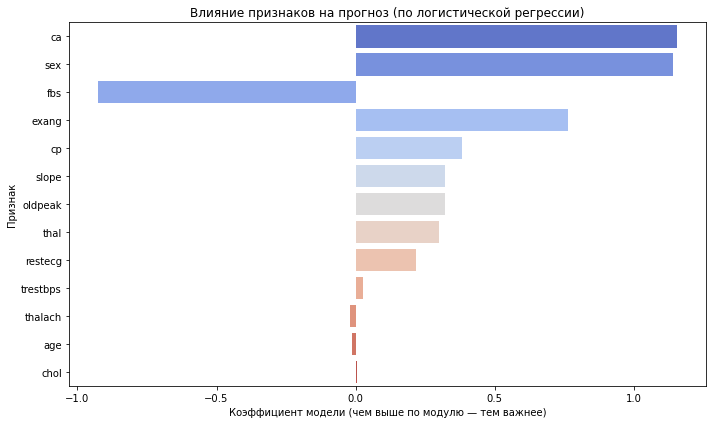

In [9]:

# 11. Визуализация важности признаков
# Получаем веса (коэффициенты) модели и соответствующие им признаки
coefficients = model.coef_[0]
features = X.columns

# Создаем DataFrame для удобства сортировки и визуализации
coef_df = pd.DataFrame({
    'Признак': features,
    'Вес (влияние)': coefficients
})

# Сортируем по убыванию абсолютного значения коэффициента
coef_df["|вес|"] = coef_df["Вес (влияние)"].abs()
coef_df = coef_df.sort_values(by="|вес|", ascending=False)

# Строим горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Вес (влияние)", y="Признак", palette="coolwarm")
plt.title("Влияние признаков на прогноз (по логистической регрессии)")
plt.xlabel("Коэффициент модели (чем выше по модулю — тем важнее)")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()

### Пояснение к визуализации
- Положительные коэффициенты увеличивают вероятность наличия болезни.
- Отрицательные коэффициенты — уменьшают вероятность.
- Чем больше модуль коэффициента, тем больше влияние признака.

### Выводы

- Модель обучена на реальных медицинских данных.
- Мы применили простую, но интерпретируемую модель (логистическая регрессия).
- Были выявлены наиболее значимые признаки (например, ca, thal, cp и oldpeak обычно оказываются в топе).
- Визуализация помогает понять, какие клинические параметры важны для диагностики.